In [11]:
import mne
import os
import pyedflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
os.chdir("/home/gs/code/high-density-eeg-analysis/")

edf_file = "./data/sleepedf/sleep-cassette/SC4002E0-PSG.edf"

ann_file = "./data/sleepedf/sleep-cassette/SC4002EC-Hypnogram.edf"


Extracting EDF parameters from /home/gs/code/high-density-eeg-analysis/data/sleepedf/sleep-cassette/SC4002E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8489999  =      0.000 ... 84899.990 secs...


/tmp/ipykernel_832731/691702667.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_train = mne.io.read_raw_edf(edf_file, preload=True)
/tmp/ipykernel_832731/691702667.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_train = mne.io.read_raw_edf(edf_file, preload=True)
/tmp/ipykernel_832731/691702667.py:7: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw_train = mne.io.read_raw_edf(edf_file, preload=True)


In [56]:

raw_train = mne.io.read_raw_edf(edf_file, preload=True)
raw_train

Extracting EDF parameters from /home/gs/code/high-density-eeg-analysis/data/sleepedf/sleep-cassette/SC4002E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8489999  =      0.000 ... 84899.990 secs...


/tmp/ipykernel_832731/1739214032.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_train = mne.io.read_raw_edf(edf_file, preload=True)
/tmp/ipykernel_832731/1739214032.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_train = mne.io.read_raw_edf(edf_file, preload=True)
/tmp/ipykernel_832731/1739214032.py:1: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw_train = mne.io.read_raw_edf(edf_file, preload=True)


<RawEDF | SC4002E0-PSG.edf, 7 x 8490000 (84900.0 s), ~453.4 MB, data loaded>

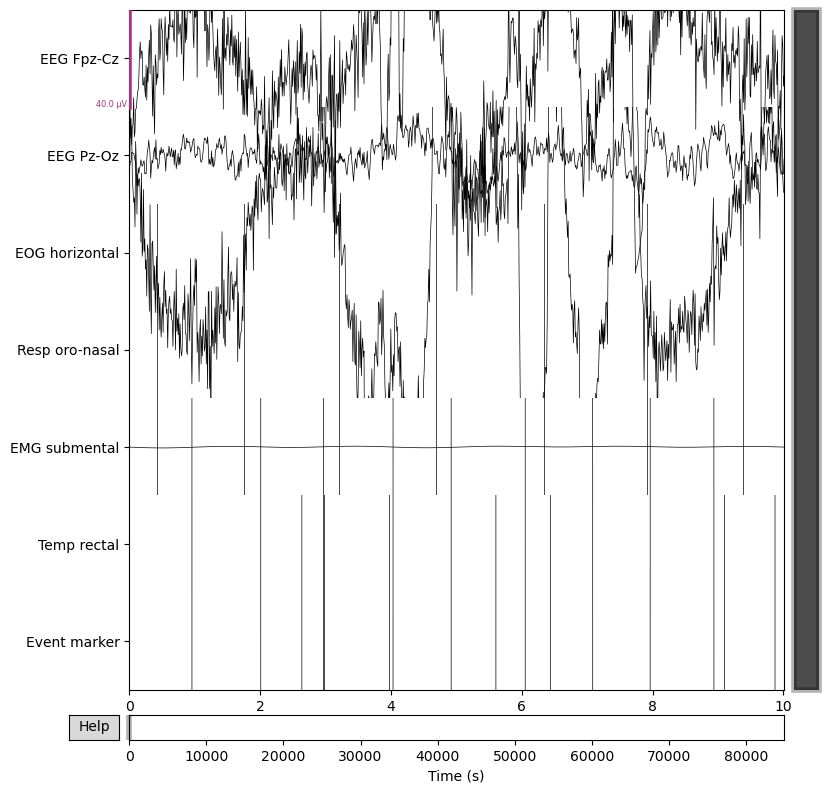

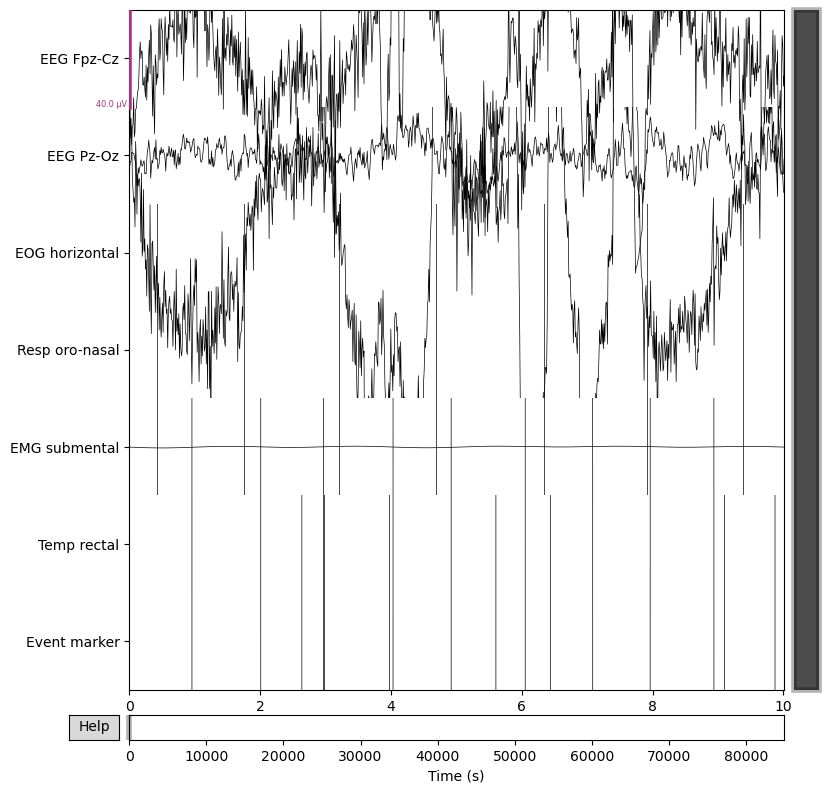

In [57]:
raw_train.plot()

In [55]:
annot_train = mne.read_annotations(ann_file)
print(annot_train)


<Annotations | 152 segments: Movement time (1), Sleep stage 1 (32), Sleep ...>


In [61]:
onsets = annot_train.onset
durations = annot_train.duration
stages = annot_train.description

print("Onsets:", onsets)
print("Durations:", durations)
print("Stages:", stages)

Onsets: [    0. 26070. 26160. 26670. 26940. 28080. 28110. 28230. 28260. 28290.
 28320. 28350. 29250. 29310. 29550. 29580. 29730. 29820. 30030. 30630.
 31110. 31140. 31260. 31290. 31320. 31440. 32550. 32790. 32820. 32880.
 32970. 33000. 33090. 33270. 33300. 33360. 33390. 33420. 33450. 33480.
 33510. 33570. 33870. 33900. 34020. 34290. 34320. 34350. 34380. 34410.
 34470. 35790. 35880. 35940. 36150. 36240. 36540. 36570. 36630. 36900.
 36960. 37110. 37140. 38160. 38190. 38220. 38310. 38340. 38430. 38490.
 38820. 38850. 38910. 39300. 39870. 39900. 39990. 40020. 40050. 40080.
 40170. 40200. 40230. 40440. 40920. 40980. 41010. 41280. 41310. 41370.
 41970. 42000. 42210. 42300. 43290. 43320. 43830. 44010. 44130. 44220.
 44460. 44490. 44610. 44670. 44850. 44880. 44910. 44940. 45390. 45450.
 45630. 45690. 45720. 45780. 46830. 46860. 46980. 47130. 47220. 47850.
 47910. 47970. 48000. 48570. 48600. 48630. 49230. 49440. 51330. 51480.
 51540. 51600. 51660. 51780. 52860. 52890. 53250. 53340. 53400. 53520

In [58]:
raw_train.set_annotations(annot_train, emit_warning=False)

<RawEDF | SC4002E0-PSG.edf, 7 x 8490000 (84900.0 s), ~453.4 MB, data loaded>

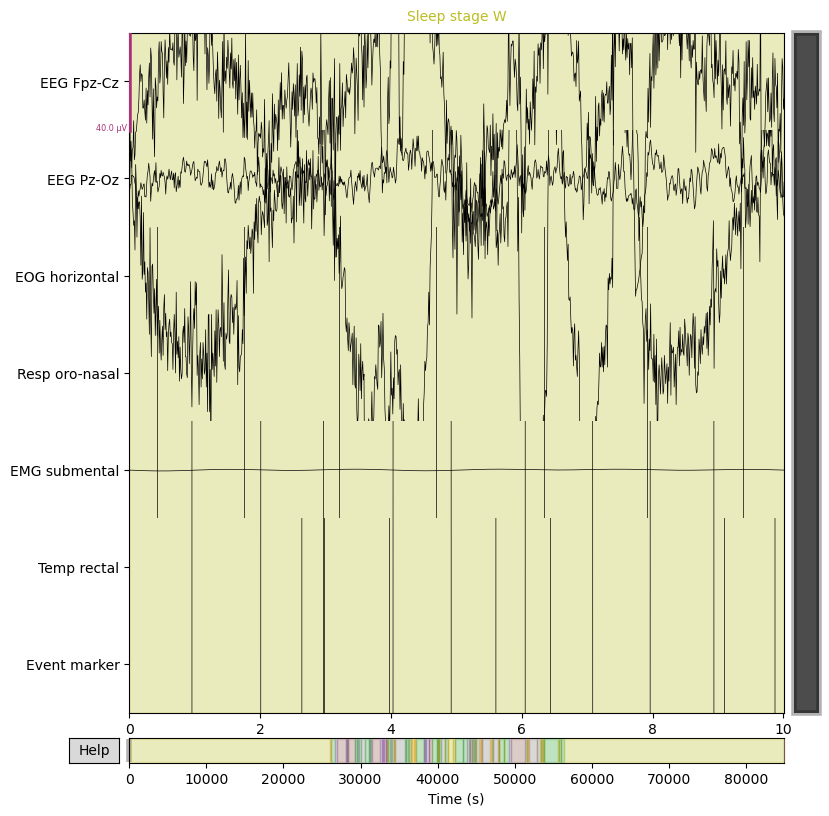

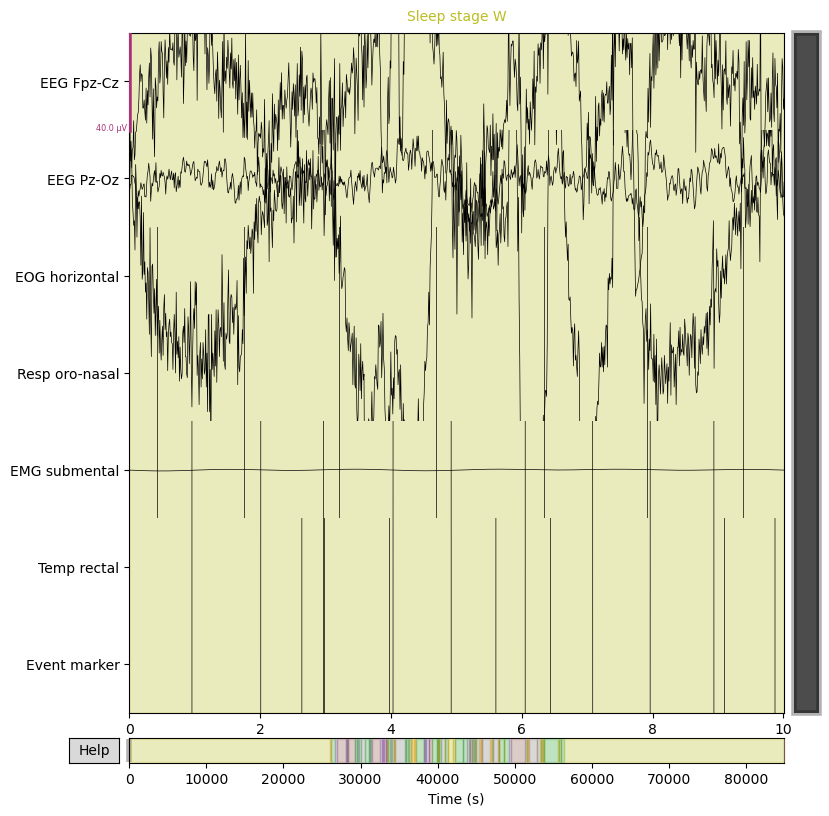

In [59]:
raw_train.plot()

In [43]:
psg_f = pyedflib.EdfReader(edf_file)


OSError: ./data/sleepedf/sleep-cassette/SC4002E0-PSG.edf: file has already been opened

In [62]:
ann_f = pyedflib.EdfReader(ann_file)
ann_f

In [46]:
psg_f.getStartdatetime()

datetime.datetime(1989, 4, 25, 14, 50)

In [47]:
ann_f.getStartdatetime()

datetime.datetime(1989, 4, 25, 14, 50)

In [24]:
start_datetime = psg_f.getStartdatetime()
start_datetime

datetime.datetime(1989, 4, 25, 14, 50)

In [23]:
file_duration = psg_f.getFileDuration()
print(f"File duration: {file_duration} seconds")


File duration: 84900.0 seconds


In [26]:
epoch_duration = psg_f.datarecord_duration
print(f"Epoch duration: {epoch_duration} seconds")

Epoch duration: 30.0 seconds


In [28]:
ch_names = psg_f.getSignalLabels()
ch_names


['EEG Fpz-Cz',
 'EEG Pz-Oz',
 'EOG horizontal',
 'Resp oro-nasal',
 'EMG submental',
 'Temp rectal',
 'Event marker']

In [29]:
ch_samples = psg_f.getNSamples()
ch_samples


array([8490000, 8490000, 8490000,   84900,   84900,   84900,   84900])

In [34]:
select_ch_idx = ch_names.index("EEG Fpz-Cz")
select_ch_idx

0

In [37]:
sampling_rate = psg_f.getSampleFrequency(select_ch_idx)
sampling_rate

100.0

In [39]:
n_epoch_samples = int(epoch_duration * sampling_rate)
n_epoch_samples

3000

In [63]:
ann_onsets, ann_durations, ann_stages = ann_f.readAnnotations()
ann_onsets, ann_durations, ann_stages   

(array([    0., 26070., 26160., 26670., 26940., 28080., 28110., 28230.,
        28260., 28290., 28320., 28350., 29250., 29310., 29550., 29580.,
        29730., 29820., 30030., 30630., 31110., 31140., 31260., 31290.,
        31320., 31440., 32550., 32790., 32820., 32880., 32970., 33000.,
        33090., 33270., 33300., 33360., 33390., 33420., 33450., 33480.,
        33510., 33570., 33870., 33900., 34020., 34290., 34320., 34350.,
        34380., 34410., 34470., 35790., 35880., 35940., 36150., 36240.,
        36540., 36570., 36630., 36900., 36960., 37110., 37140., 38160.,
        38190., 38220., 38310., 38340., 38430., 38490., 38820., 38850.,
        38910., 39300., 39870., 39900., 39990., 40020., 40050., 40080.,
        40170., 40200., 40230., 40440., 40920., 40980., 41010., 41280.,
        41310., 41370., 41970., 42000., 42210., 42300., 43290., 43320.,
        43830., 44010., 44130., 44220., 44460., 44490., 44610., 44670.,
        44850., 44880., 44910., 44940., 45390., 45450., 45630., 